In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier  # Importing GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [71]:
data = pd.read_csv('diabetes_012_health_indicators.csv')


In [73]:
print("Data Overview:\n", data.head())
print("\nData Info:\n")
data.info()

Data Overview:
    Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0     

In [75]:
print("\nMissing Values:\n", data.isnull().sum())



Missing Values:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [77]:
data = data.dropna()

In [79]:
X = data.drop(columns=['Diabetes_012'])  # Features
y = data['Diabetes_012']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 4]
}

In [98]:

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42, validation_fraction=0.1, n_iter_no_change=10)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(n_iter_no_change=10, random_state=42)

In [100]:
model = randomized_search.best_estimator_
print("Best Parameters for Gradient Boosting:", randomized_search.best_params_)

Best Parameters for Gradient Boosting: {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}


In [102]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [104]:
print("\nAccuracy of the Gradient Boosting Classifier model:", accuracy)


Accuracy of the Gradient Boosting Classifier model: 0.8508751182592242


In [106]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.56      0.20      0.29      6997

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.81      0.85      0.81     50736


Confusion Matrix:
 [[41805     1   989]
 [  852     0    92]
 [ 5632     0  1365]]


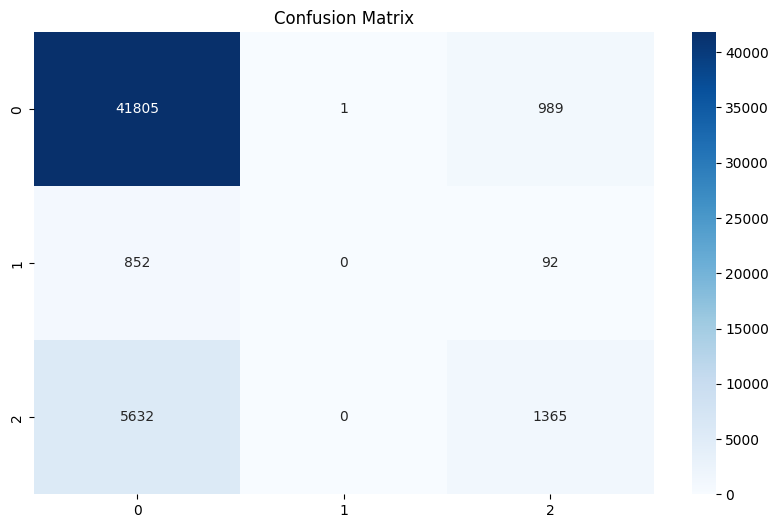

In [108]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

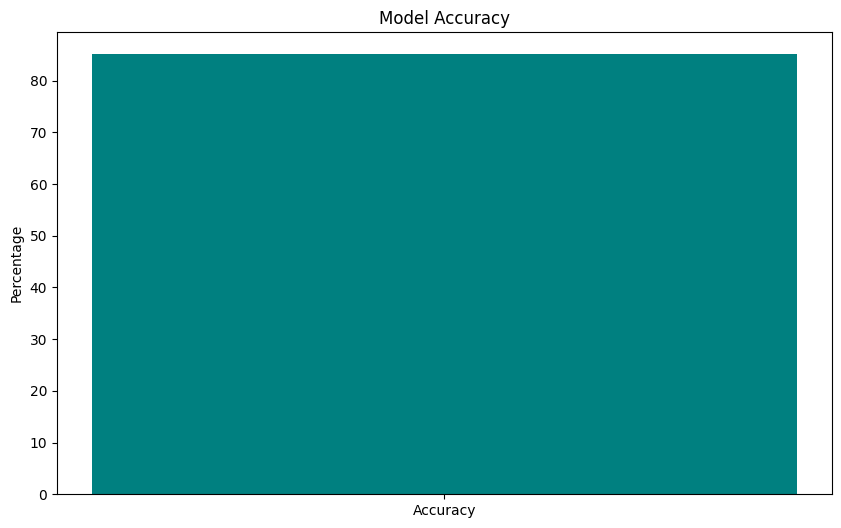

In [110]:
plt.figure(figsize=(10, 6))
plt.bar(['Accuracy'], [accuracy * 100], color='teal')
plt.ylabel('Percentage')
plt.title('Model Accuracy')
plt.show()

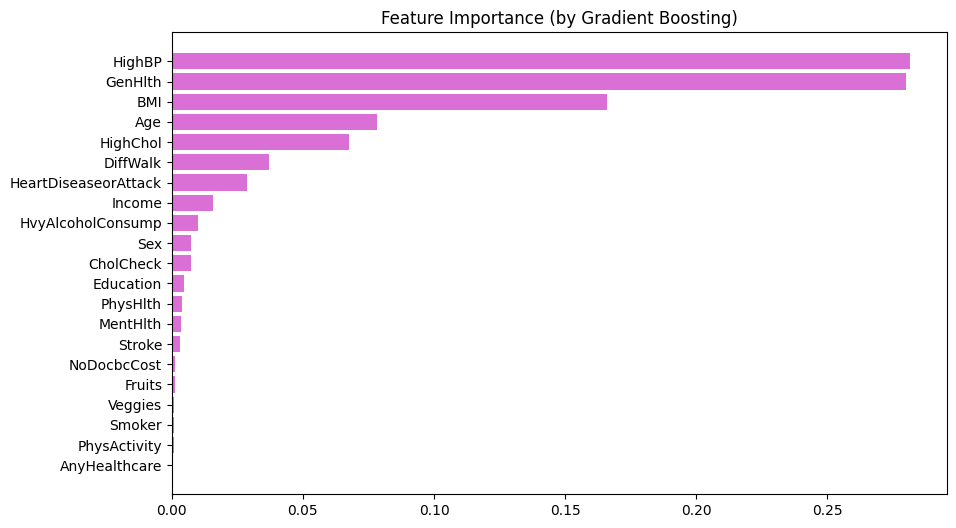

In [112]:
importance = model.feature_importances_  # Extract feature importances
sorted_idx = np.argsort(importance)
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], importance[sorted_idx], color='orchid')
plt.title('Feature Importance (by Gradient Boosting)')
plt.show()

In [118]:
from sklearn.metrics import roc_curve, auc

In [120]:
probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs, pos_label=1)
roc_auc = auc(fpr, tpr)

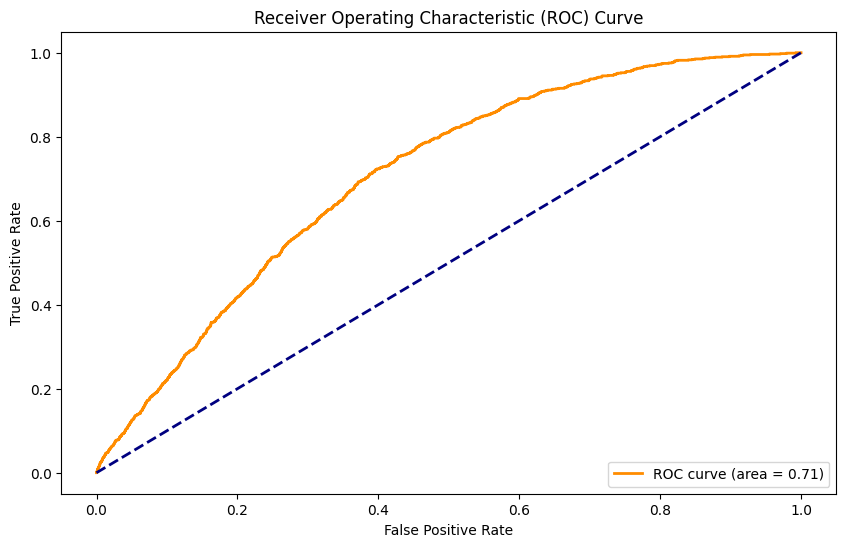

In [122]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [124]:
all_features = list(X.columns)
user_input = {feature: 0 for feature in all_features}

In [128]:
user_input.update({
    'Age': float(input("Enter Age: ")),
    'BMI': float(input("Enter BMI: ")),
    'HighBP': int(input("Enter High Blood Pressure (1 for Yes, 0 for No): ")),
    'HighChol': int(input("Enter High Cholesterol (1 for Yes, 0 for No): ")),
    'CholCheck': int(input("Enter Cholesterol Check (1 for Yes, 0 for No): ")),
    'Smoker': int(input("Enter Smoker (1 for Yes, 0 for No): ")),
    'Stroke': int(input("Enter Stroke History (1 for Yes, 0 for No): "))
})

user_df = pd.DataFrame([user_input])[all_features]
user_df_scaled = scaler.transform(user_df)
probs = model.predict_proba(user_df_scaled)  # Get prediction probabilities
disease_prediction = model.predict(user_df_scaled)

print("\nPrediction for the given patient details:\n")
if disease_prediction[0] == 0 and max(probs[0]) < 0.7:  # If no strong prediction, alert uncertainty
    print("The model is uncertain about the patient's risk. Further assessment may be required.")
elif disease_prediction[0] == 0:
    print("The patient is not at risk of disease.")
elif disease_prediction[0] == 1:
    print("The patient is at mild risk of diabetes.")
else:
    print("The patient is at severe risk of diabetes.")

Enter Age:  34
Enter BMI:  24
Enter High Blood Pressure (1 for Yes, 0 for No):  1
Enter High Cholesterol (1 for Yes, 0 for No):  0
Enter Cholesterol Check (1 for Yes, 0 for No):  1
Enter Smoker (1 for Yes, 0 for No):  0
Enter Stroke History (1 for Yes, 0 for No):  1



Prediction for the given patient details:

The patient is not at risk of disease.
